### PROYECTO FINAL: ESTUDIO DE POLITICA FISCAL Y SOSTENIBILIDAD DE LA DEUDA ESPAÑOLA

## LIBRERÍAS:

In [147]:
# LIBRERÍAS:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## LIMPIEZA Y TRANSFORMACIÓN DE DATOS:

In [148]:
# Ruta de la base de datos 1. PIB pm Demanda (Precios corrientes):
file_path = r"C:\Users\anasa\Desktop\Ana\IRONHACK\Proyecto final\Proyecto ll\files\BD para estudio de sostenibilidad de la deuda.xlsx"

# Leer la base datos de 1. PIB pm Demanda (Precios corrientes):
df = pd.read_excel(file_path)

# Visualizaxion de la tabla completa, queremos ver que coge todas las variables que necesitamos para el analisis:
df.head()

,año,PIB anual,tasa de crecimeinto del PIB (%),deuda total (M.€),deuda (PIB),deuda per capita,tipo de interés medio de la deuda in ciculación,inflación media de España (IPC) – por año,déficit (M.€),déficit (%PIB),presión fiscal (%PIB),tasa natalidad,Indice de fecundidad,gasto publico (M.€),gasto educación (%Gto Pub),gasto en salud (%G. Público Total),gasto en defensa (%Gto Pub),gasto público (%PIB)
0,2023,1461889,2.5,1573754,107.7,32375,1.952,"3,56",-53159,-0.0364,NaN,"6,70‰",NaN,678820.0,0.00,0.00,0.00,46.4
1,2022,1346377,5.8,1502799,111.6,31277,1.735,"8,40",-63736,-0.0473,0.380,"6,88‰",1.16,637831.0,0.00,0.00,3.14,47.4
2,2021,1222290,6.4,1428133,116.8,30074,1.642,"3,09",-82262,-0.0673,0.383,"7,10‰",1.18,611470.0,9.18,15.19,2.74,50.0
3,2020,1119010,-11.2,1345786,120.3,28393,1.862,"-0,32",-113199,-0.1012,0.374,"7,19‰",1.18,580771.0,9.02,15.13,1.91,51.9
4,2019,1245513,2.0,1223355,98.2,25846,2.202,"0,70",-38116,-0.0306,0.352,"7,62‰",1.23,526652.0,9.58,15.26,2.15,42.3


In [149]:
# Paso 1: Convertir la columna a tipo string
df['tasa natalidad'] = df['tasa natalidad'].astype(str)

In [150]:
# Paso 2: Eliminar el símbolo "‰" y cualquier espacio adicional
df['tasa natalidad'] = df['tasa natalidad'].str.replace('‰', '', regex=False).str.strip()

In [151]:
df['tasa natalidad']=df['tasa natalidad'].str.replace(',', '.').astype(float)/1000

In [152]:
# Vamos a convertir la columna 'año' a datetime, estableciendo el formato como AAAA
df['año'] = pd.to_datetime(df['año'].astype(str) + '-01-01')

In [153]:
#Usamos el método isna() para identificar los valores NaN y luego suma los True (1) para contarlos en cada columna
conteo_nan_por_columna = df.isna().sum()

# Muestra el conteo de NaN por columna
print(conteo_nan_por_columna)

año                                                 0
PIB anual                                           0
tasa de crecimeinto del PIB (%)                     0
deuda total (M.€)                                   0
deuda (PIB)                                         0
deuda per capita                                    0
tipo de interés medio de la deuda in ciculación    22
inflación media de España (IPC) – por año           0
déficit (M.€)                                       0
déficit (%PIB)                                      0
presión fiscal (%PIB)                               1
tasa natalidad                                      0
Indice de fecundidad                                1
gasto publico (M.€)                                 0
gasto educación (%Gto Pub)                          0
gasto en salud (%G. Público Total)                  0
gasto en defensa (%Gto Pub)                         0
gasto público (%PIB)                                0
dtype: int64


In [154]:
# Checkeamos tambien si existen celdas vacías
# Suma los valores nulos en cada columna
conteo_nulos_por_columna = df.isnull().sum()

# Muestra el conteo de valores nulos por columna
print(conteo_nulos_por_columna)
# Como no hay no hacemos ningun otro analisis

año                                                 0
PIB anual                                           0
tasa de crecimeinto del PIB (%)                     0
deuda total (M.€)                                   0
deuda (PIB)                                         0
deuda per capita                                    0
tipo de interés medio de la deuda in ciculación    22
inflación media de España (IPC) – por año           0
déficit (M.€)                                       0
déficit (%PIB)                                      0
presión fiscal (%PIB)                               1
tasa natalidad                                      0
Indice de fecundidad                                1
gasto publico (M.€)                                 0
gasto educación (%Gto Pub)                          0
gasto en salud (%G. Público Total)                  0
gasto en defensa (%Gto Pub)                         0
gasto público (%PIB)                                0
dtype: int64


Observamos que al data frame le faltan 22 datos de los intereses de la deuda. Asía que es posible que analicemos datos desde la actualidad hasta el año 2002.

In [155]:
# Vamos a clasificar todas las variables numericas, ed decir, todas menos la de fecha, en una variable llamada numericals:
numericals = df.select_dtypes(include=['float64', 'int64'])

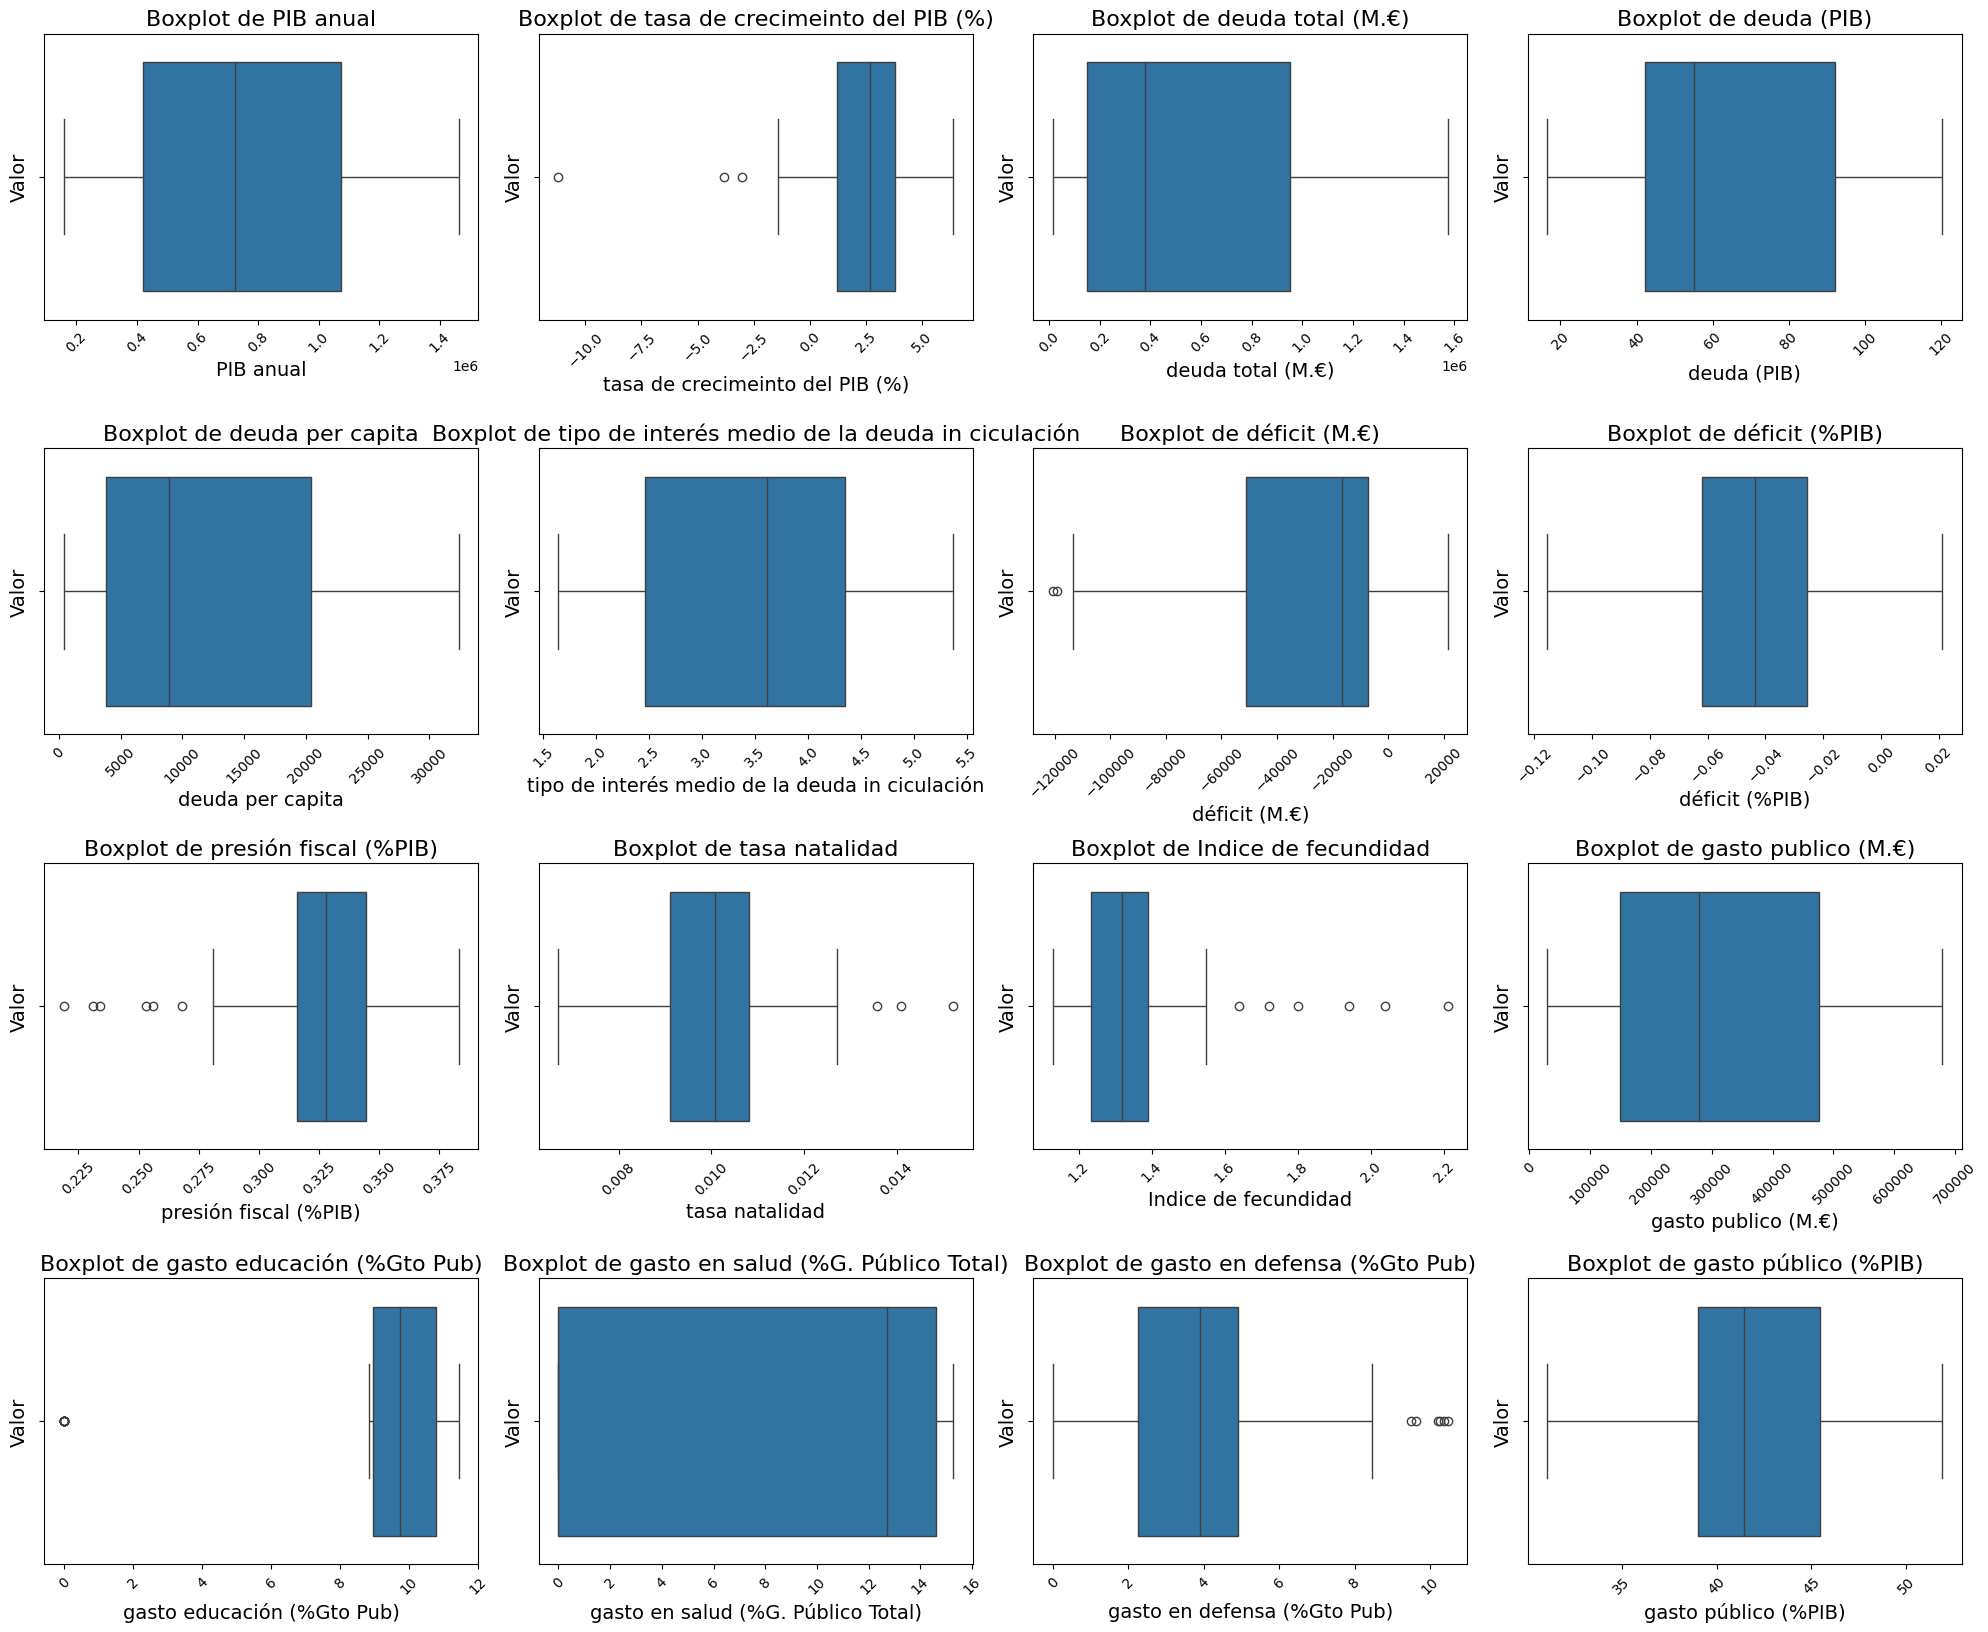

In [156]:
# Supongamos que ya tienes un DataFrame llamado df
# Vamos a identificar las columnas numéricas
numericals = df.select_dtypes(include=['float64', 'int64']).columns

# Ajustamos el tamaño de la figura
plt.figure(figsize=(20, 20))

# Iteramos sobre cada columna numérica y creamos un boxplot separado
for i, columna in enumerate(numericals, 1):
    plt.subplot(5, 4, i)  # Filas: 5, Columnas: 4, Índice de la subfigura: i
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
    plt.ylabel('Valor', fontsize=14)

plt.tight_layout()  # Ajustar el diseño de los subplots
plt.show()


Explicación de porque no quitas outliers

<class 'pandas.core.frame.DataFrame'>
   PIB anual  tasa de crecimeinto del PIB (%)  deuda total (M.€)  deuda (PIB)  \
0    1461889                              2.5            1573754        107.7   
1    1346377                              5.8            1502799        111.6   
2    1222290                              6.4            1428133        116.8   
3    1119010                            -11.2            1345786        120.3   
4    1245513                              2.0            1223355         98.2   

   deuda per capita  tipo de interés medio de la deuda in ciculación  \
0             32375                                            1.952   
1             31277                                            1.735   
2             30074                                            1.642   
3             28393                                            1.862   
4             25846                                            2.202   

   déficit (M.€)  déficit (%PIB)  presión 

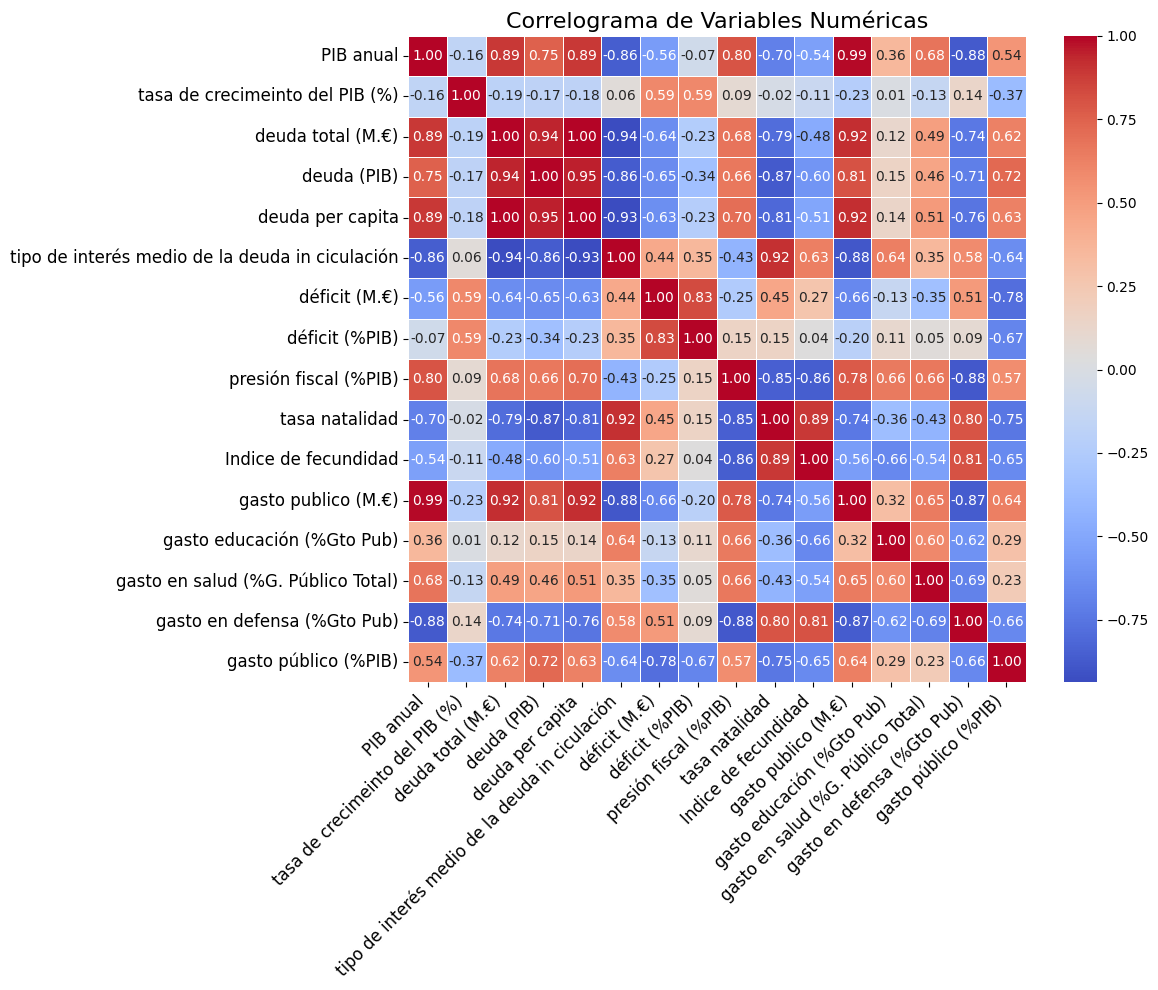

In [157]:
# Asegúrate de que numericals contiene las columnas numéricas
numericals = df.select_dtypes(include=['float64', 'int64'])

# Verifica el tipo de numericals
print(type(numericals))  # Debe ser <class 'pandas.core.frame.DataFrame'>
print(numericals.head())  # Muestra las primeras filas del DataFrame
# Calcula la matriz de correlación
correlation_matrix = numericals.corr()

# Muestra la matriz de correlación
print(correlation_matrix)
# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea el mapa de calor (heatmap)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Añade títulos y etiquetas
plt.title('Correlograma de Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Muestra el gráfico
plt.tight_layout()
plt.show()


## ESTUDIO GRÁFICO:

1) ANÁLISIS DEL TONO DE POLITICA FISCAL.
A falta de mas detalle sobre estabilizadores automáticos y medidas one-off, este análisis lo vamos a hacer usando el saldo publico como diferencia entre los ingresos y gastos del sector publico (déficit público). 

Existe una relación moderada entre la tasa de crcimiento de PIB y el porcentaje de deficit sobre PIB. Es decir, podemos decir que existe una  relación positiva entre el déficit y el crecimiento del PIB. sin embargo, no es muy elevada para hacer predicciones exactas. A medida que la tasa de crecimiento del PIB crece, el déficit (%PIB) aumentará también, esto supone que podemos confirmar que se trata de una variable procíclica. Al no ser la correlación muy alta podemos considerar que existirán otras variables condicionando la evolución del deficit y por tanto el tono de la politica fiscal.

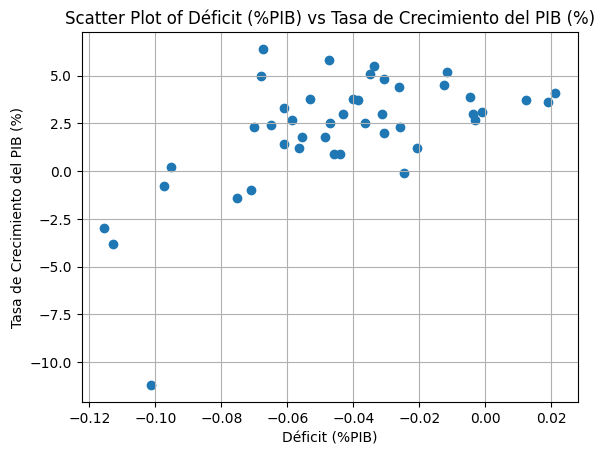

In [158]:
# Datos de ejemplo para déficit y tasa de crecimiento del PIB
def_pib = df["déficit (%PIB)"]  # Déficit en porcentaje del PIB
creci_pib = df["tasa de crecimeinto del PIB (%)"]  # Tasa de crecimiento del PIB en porcentaje

# Crear el scatter plot
plt.scatter(def_pib, creci_pib)
plt.title('Scatter Plot of Déficit (%PIB) vs Tasa de Crecimiento del PIB (%)')
plt.xlabel('Déficit (%PIB)')
plt.ylabel('Tasa de Crecimiento del PIB (%)')
plt.grid(True)  # Agregar una cuadrícula para mayor claridad
plt.show()


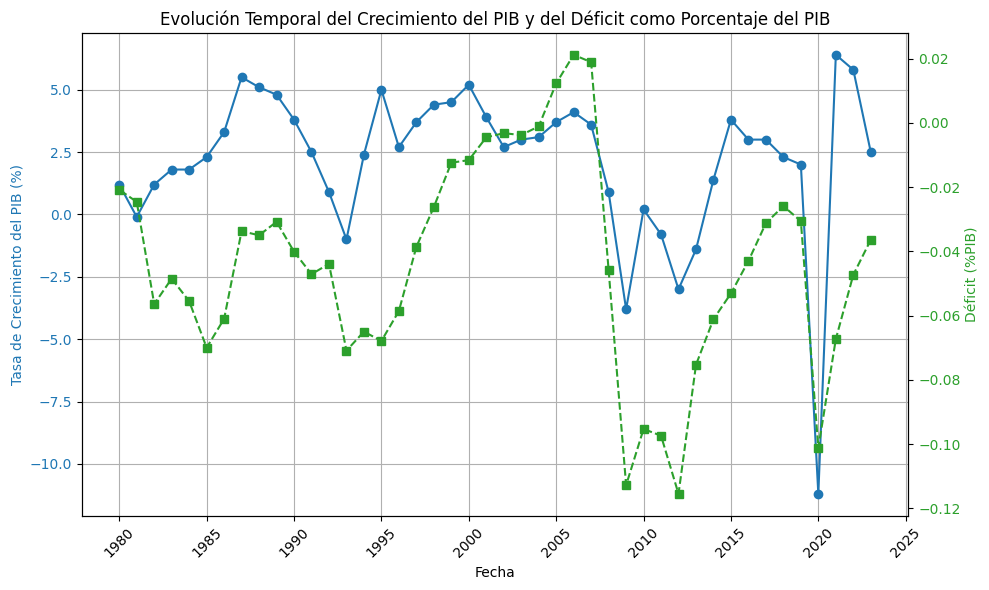

In [159]:

# Crear el gráfico de líneas
fig, ax1 = plt.subplots(figsize=(10, 6))  # Tamaño del gráfico

# Graficar la primera variable en el eje y izquierdo
color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Tasa de Crecimiento del PIB (%)', color=color)
ax1.plot(df['año'], df['tasa de crecimeinto del PIB (%)'], label='Var. PIB', marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje y para la segunda variable
ax2 = ax1.twinx()  # Instancia de un segundo eje y compartiendo el mismo eje x
color = 'tab:green'
ax2.set_ylabel('Déficit (%PIB)', color=color)
ax2.plot(df['año'], df['déficit (%PIB)'], label='Déficit/PIB', marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Añadir títulos y etiquetas
plt.title('Evolución Temporal del Crecimiento del PIB y del Déficit como Porcentaje del PIB')

# Opcional: añadir líneas de grid para mejorar la legibilidad
ax1.grid(True)

# Ajustar la rotación de las etiquetas del eje x para mejor legibilidad
ax1.tick_params(axis='x', rotation=45)

# Mostrar el gráfico
fig.tight_layout()  # Ajustar el layout para evitar superposición
plt.show()


analisis de tono de PF:
xxxxxxx


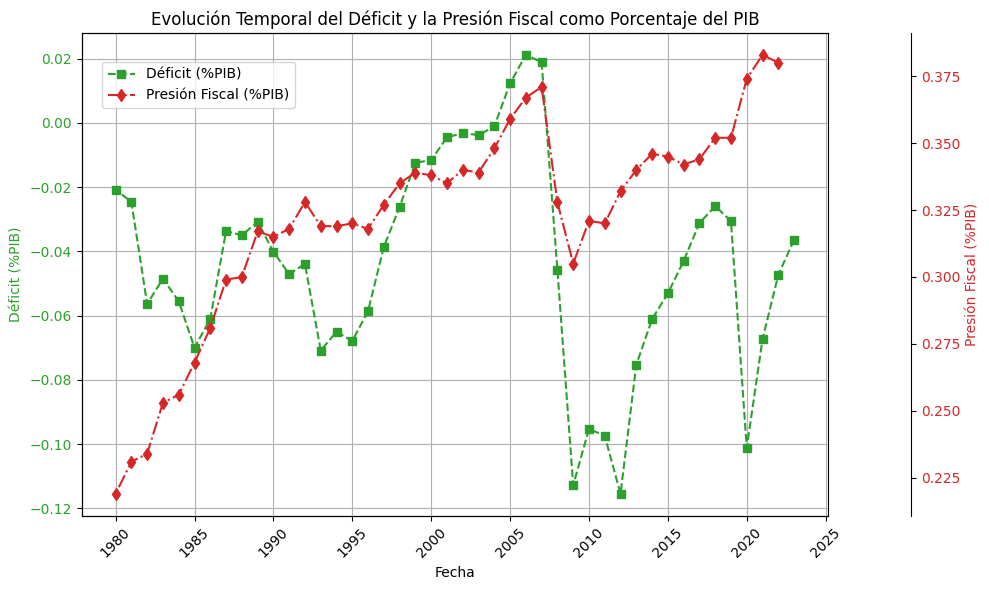

In [160]:
# Crear el gráfico de líneas
fig, ax1 = plt.subplots(figsize=(10, 6))  # Tamaño del gráfico

# Graficar la primera variable en el eje y izquierdo
color = 'tab:green'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Déficit (%PIB)', color=color)
ax1.plot(df['año'], df['déficit (%PIB)'], label='Déficit (%PIB)', marker='s', linestyle='--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje y para la segunda variable
ax2 = ax1.twinx()  # Instancia de un segundo eje y compartiendo el mismo eje x
ax2.spines['right'].set_position(('outward', 60))  # Mover el segundo eje a la derecha
color = 'tab:red'
ax2.set_ylabel('Presión Fiscal (%PIB)', color=color)
ax2.plot(df['año'], df['presión fiscal (%PIB)'], label='Presión Fiscal (%PIB)', marker='d', linestyle='-.', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Añadir títulos y etiquetas
plt.title('Evolución Temporal del Déficit y la Presión Fiscal como Porcentaje del PIB')

# Opcional: añadir líneas de grid para mejorar la legibilidad
ax1.grid(True)

# Ajustar la rotación de las etiquetas del eje x para mejor legibilidad
ax1.tick_params(axis='x', rotation=45)

# Añadir leyenda
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Mostrar el gráfico
fig.tight_layout()  # Ajustar el layout para evitar superposición
plt.show()

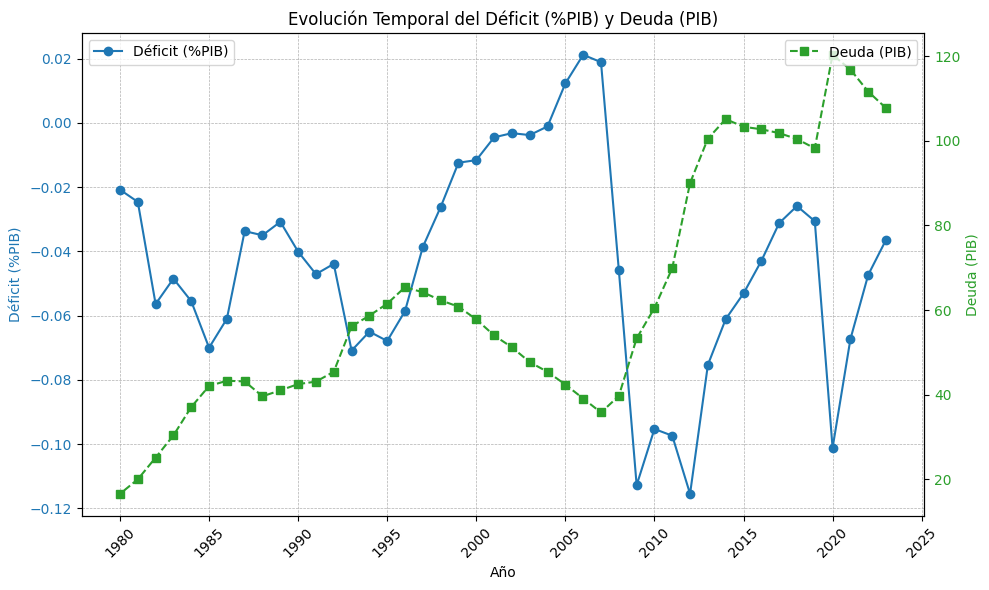

In [161]:
# Crear el gráfico de líneas
fig, ax1 = plt.subplots(figsize=(10, 6))  # Tamaño del gráfico

# Graficar 'déficit (%PIB)' en el eje y izquierdo
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Déficit (%PIB)', color=color)
ax1.plot(df['año'], df['déficit (%PIB)'], label='Déficit (%PIB)', marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje y para 'deuda (PIB)'
ax2 = ax1.twinx()  # Instancia de un segundo eje y compartiendo el mismo eje x
color = 'tab:green'
ax2.set_ylabel('Deuda (PIB)', color=color)
ax2.plot(df['año'], df['deuda (PIB)'], label='Deuda (PIB)', marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Añadir títulos y etiquetas
plt.title('Evolución Temporal del Déficit (%PIB) y Deuda (PIB)')

# Opcional: añadir líneas de grid para mejorar la legibilidad
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar la rotación de las etiquetas del eje x para mejor legibilidad
ax1.tick_params(axis='x', rotation=45)

# Añadir leyendas
fig.tight_layout()  # Ajustar el layout para evitar superposición
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()


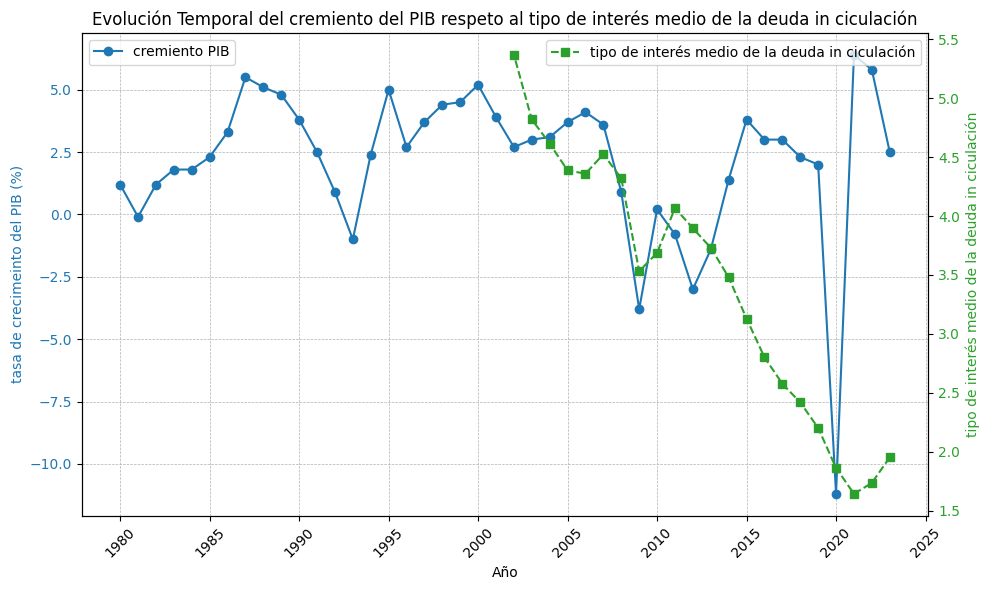

In [162]:
# Crear el gráfico de líneas
fig, ax1 = plt.subplots(figsize=(10, 6))  # Tamaño del gráfico


color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('tasa de crecimeinto del PIB (%)', color=color)
ax1.plot(df['año'], df['tasa de crecimeinto del PIB (%)'], label='cremiento PIB', marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje y para 'deuda (PIB)'
ax2 = ax1.twinx()  # Instancia de un segundo eje y compartiendo el mismo eje x
color = 'tab:green'
ax2.set_ylabel('tipo de interés medio de la deuda in ciculación', color=color)
ax2.plot(df['año'], df['tipo de interés medio de la deuda in ciculación'], label='tipo de interés medio de la deuda in ciculación', marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Añadir títulos y etiquetas
plt.title('Evolución Temporal del cremiento del PIB respeto al tipo de interés medio de la deuda in ciculación')

# Opcional: añadir líneas de grid para mejorar la legibilidad
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar la rotación de las etiquetas del eje x para mejor legibilidad
ax1.tick_params(axis='x', rotation=45)

# Añadir leyendas
fig.tight_layout()  # Ajustar el layout para evitar superposición
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

In [163]:
df.head()

,año,PIB anual,tasa de crecimeinto del PIB (%),deuda total (M.€),deuda (PIB),deuda per capita,tipo de interés medio de la deuda in ciculación,inflación media de España (IPC) – por año,déficit (M.€),déficit (%PIB),presión fiscal (%PIB),tasa natalidad,Indice de fecundidad,gasto publico (M.€),gasto educación (%Gto Pub),gasto en salud (%G. Público Total),gasto en defensa (%Gto Pub),gasto público (%PIB)
0,2023-01-01,1461889,2.5,1573754,107.7,32375,1.952,"3,56",-53159,-0.0364,NaN,0.00670,NaN,678820.0,0.00,0.00,0.00,46.4
1,2022-01-01,1346377,5.8,1502799,111.6,31277,1.735,"8,40",-63736,-0.0473,0.380,0.00688,1.16,637831.0,0.00,0.00,3.14,47.4
2,2021-01-01,1222290,6.4,1428133,116.8,30074,1.642,"3,09",-82262,-0.0673,0.383,0.00710,1.18,611470.0,9.18,15.19,2.74,50.0
3,2020-01-01,1119010,-11.2,1345786,120.3,28393,1.862,"-0,32",-113199,-0.1012,0.374,0.00719,1.18,580771.0,9.02,15.13,1.91,51.9
4,2019-01-01,1245513,2.0,1223355,98.2,25846,2.202,"0,70",-38116,-0.0306,0.352,0.00762,1.23,526652.0,9.58,15.26,2.15,42.3


In [164]:
# Calcular la sostenibilidad de la deuda
df['sostenibilidad'] = (df["tasa de crecimeinto del PIB (%)"] - df["tipo de interés medio de la deuda in ciculación"]) / df["deuda (PIB)"]

# Agregar una columna para indicar si la deuda es sostenible
df['deuda_sostenible'] = df['sostenibilidad'] > 0

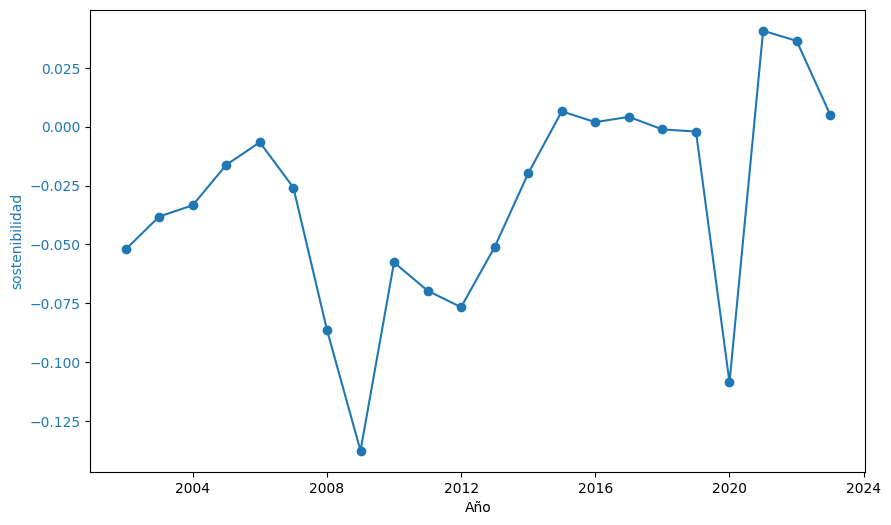

In [165]:
# Crear el gráfico de líneas para la sostenibilidad
fig, ax1 = plt.subplots(figsize=(10, 6))  # Tamaño del gráfico


color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('sostenibilidad', color=color)
ax1.plot(df['año'], df['sostenibilidad'], label='Evolución de la sostenibilidad', marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

In [166]:
df.head()

,año,PIB anual,tasa de crecimeinto del PIB (%),deuda total (M.€),deuda (PIB),deuda per capita,tipo de interés medio de la deuda in ciculación,inflación media de España (IPC) – por año,déficit (M.€),déficit (%PIB),presión fiscal (%PIB),tasa natalidad,Indice de fecundidad,gasto publico (M.€),gasto educación (%Gto Pub),gasto en salud (%G. Público Total),gasto en defensa (%Gto Pub),gasto público (%PIB),sostenibilidad,deuda_sostenible
0,2023-01-01,1461889,2.5,1573754,107.7,32375,1.952,"3,56",-53159,-0.0364,NaN,0.00670,NaN,678820.0,0.00,0.00,0.00,46.4,0.005088,True
1,2022-01-01,1346377,5.8,1502799,111.6,31277,1.735,"8,40",-63736,-0.0473,0.380,0.00688,1.16,637831.0,0.00,0.00,3.14,47.4,0.036425,True
2,2021-01-01,1222290,6.4,1428133,116.8,30074,1.642,"3,09",-82262,-0.0673,0.383,0.00710,1.18,611470.0,9.18,15.19,2.74,50.0,0.040736,True
3,2020-01-01,1119010,-11.2,1345786,120.3,28393,1.862,"-0,32",-113199,-0.1012,0.374,0.00719,1.18,580771.0,9.02,15.13,1.91,51.9,-0.108579,False
4,2019-01-01,1245513,2.0,1223355,98.2,25846,2.202,"0,70",-38116,-0.0306,0.352,0.00762,1.23,526652.0,9.58,15.26,2.15,42.3,-0.002057,False


In [168]:
ruta_csv = r'C:\Users\anasa\Desktop\Ana\IRONHACK\Proyecto final\Proyecto ll\01_exploratory_analysis.csv'
df.to_csv(ruta_csv, index=False, encoding='utf-8')